In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprice.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


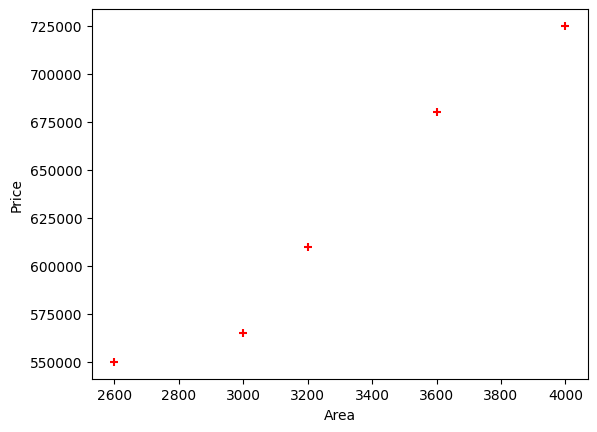

In [3]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area, df.price, color='red', marker='+')

In [4]:
model = linear_model.LinearRegression()
model.fit(df[['area']], df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
model.predict([[3300]])

C:\Users\Joel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [6]:
model.coef_

array([135.78767123])

In [7]:
model.intercept_

np.float64(180616.43835616432)

In [8]:
model.predict([[5000]])

C:\Users\Joel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

Saving the model using Pickle and Joblib

In [13]:
import pickle
import joblib

In [15]:
with open("model_pickle", "wb") as f:
    pickle.dump(model, f)

with open("model_pickle", "rb") as f:
    mp = pickle.load(f)
    print(mp.predict([[5000]]))

[859554.79452055]


C:\Users\Joel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
joblib.dump(model, "model_joblib")
mj = joblib.load("model_joblib")
print(mj.predict([[5000]]))

[859554.79452055]


C:\Users\Joel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
df2 = pd.read_csv("homeprice2.csv")
df2.head(4)

,area
0,1000
1,1500
2,2300
3,3540


In [34]:
price = model.predict(df2)

In [35]:
df2['price'] = price

In [37]:
df2.to_csv("prediction.csv", index=False)

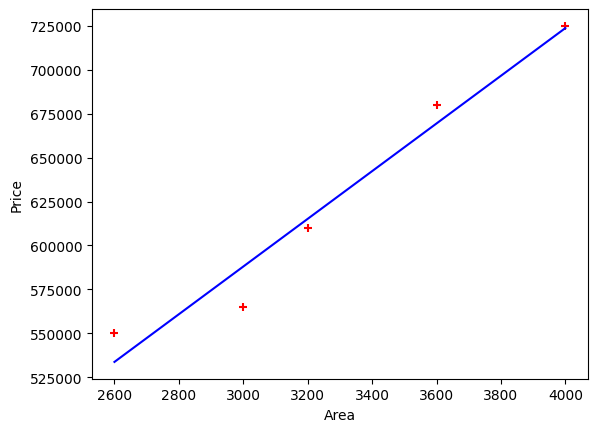

In [41]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, model.predict(df[['area']]), color='blue')